#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**

Marcos Eduardo García Ortiz A01276213

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [175]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
from google.colab import drive
drive.mount('/content/drive')

import os
DIR = "/content/drive/MyDrive/Maestria/Segundo Trimestre/IAyAA/Actividad 4/credit_info"
os.chdir(DIR)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

# Modelos de Claisficación:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Cargamos los datos:
df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [38]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

df.columns = [         'status',
                       'duration',
                       'credit_history',
                       'purpose',
                       'amount',
                       'savings',
                       'employment_duration',
                       'installment_rate',
                       'personal_status_sex',
                       'other_debtors',
                       'present_residence',
                       'property',
                       'age',
                       'other_installment_plans',
                       'housing',
                       'number_credits',
                       'job',
                       'people_liable',
                       'telephone',
                       'foreign_worker',
                       'credit_risk']


# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [39]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************
#XtrainT = XtrainT.replace({"BusinessTravel": dict})
dict = {0:1, 1:0}
df.replace({"credit_risk": dict}, inplace=True)

# *********** Aquí termina la sección de agregar código *************
print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [40]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
category_columns = [cat for cat in df.columns.to_list()
                      if cat not in
                       ['age','duration','amount']]

df[category_columns] = df[category_columns].astype("category")


X = df.drop(['credit_risk'], axis=1)
y = df['credit_risk']

# Dividir el conjunto en training y remaining
Xtrain, Xrem, ytrain, yrem = train_test_split(X,y, train_size=0.7, stratify=y, random_state=507)

# Ahora divir el conjunto remaining en validation y test a la mitad
# 30% dividido 15% y 15%
Xval, Xtest, yval, ytest = train_test_split(Xrem,yrem, test_size=0.5, stratify=yrem, random_state=507)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

1.   Status (4 niveles): El estado de cuenta del deudor con el banco
2.   Credit history (5 niveles): El historial del contrato de créditos anteriores o actuales.
3.   Purpose (11 niveles): La razón detras del crédito
4.   Savings (5 niveles): Los ahorros totales del deudor
5.   Personal Status Sex (4 niveles): Información sobre el sexo y el estado civil del deudor
6.   Other debtors (3 niveles): Otro deudor para el crédito
7.   Other Installment Plans (3 niveles): Cualquier otro crédito/cuotas que no sean del banco que otorga el crédito
8.   Housing (3 niveles): Estado de residencia actual

### **Variables Categóricas Ordinales:**
1.   Employment duration (5 niveles): La duración del empleo de un deudor con la organización actual
2.   Installment rate (4 niveles): El total de cuotas del crédito del ingreso disponible del deudor.
3.   Present residence (4 niveles): Tiempo viviendo en la residencia actual
4.   Property (4 niveles): Clasificacion de la propiedad del deudor en orden ascendente
5.   Number credits (4 niveles): Historial completo de los créditos tomados
6.   Job (4 niveles): El nivel del trabajo del deudor.

### **Variables Categóricas Binarias:**

1.   Telephone: Estado de la línea fija registrada a nombre del deudor
2.   Foreign Worker: ¿El deudor es extranjero?
3.   Credit risk: Bueno o Malo
4.   People liable: El número total de pares que dependen financieramente del deudor

### **Variables Numéricas:**

1.   Duration: Duración del crédito en meses
2.   Amount: Cantidad total del crédito
3.   Age: Edad del deudor



### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

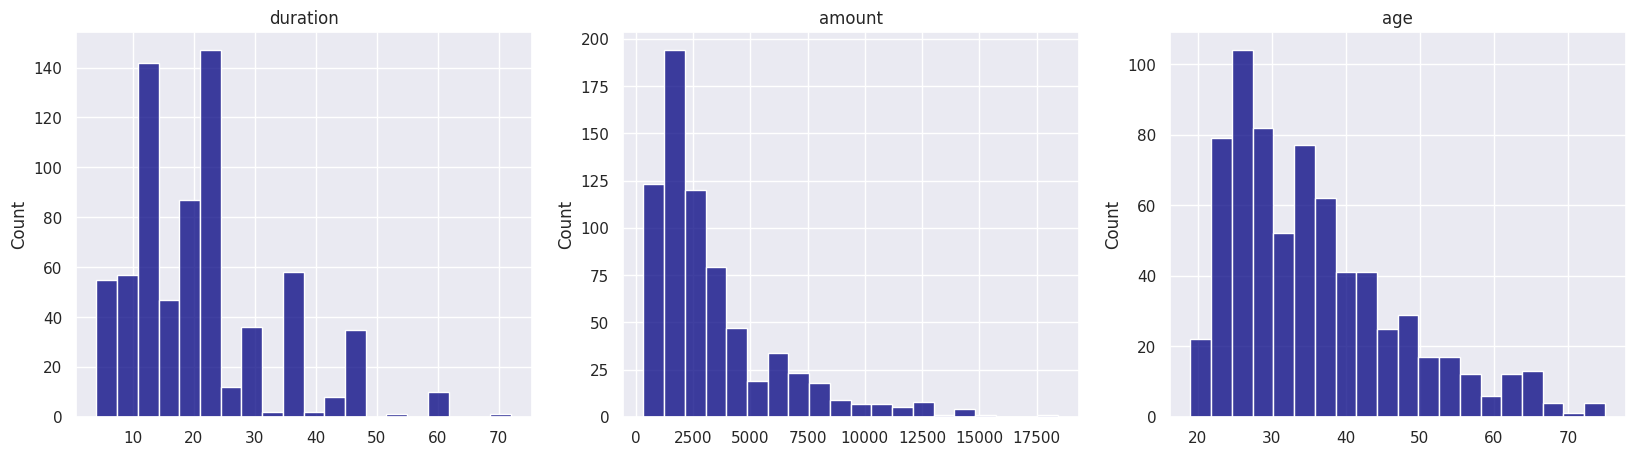

In [41]:
# Plotting histograms
def hist_numeric(df):
  sns.set_theme()
  fig, axes = plt.subplots(1,3, figsize=(20,5))
  axes = axes.ravel()
  plt.subplots_adjust(wspace=0.2,hspace=0.3)
  for colname, ax in zip(df.select_dtypes(include=np.number).columns.tolist(), axes):
    sns.histplot(x=df[colname],ax=ax,bins=20, color='navy')
    ax.set(title=f'{(colname)}', xlabel=None)

hist_numeric(Xtrain)

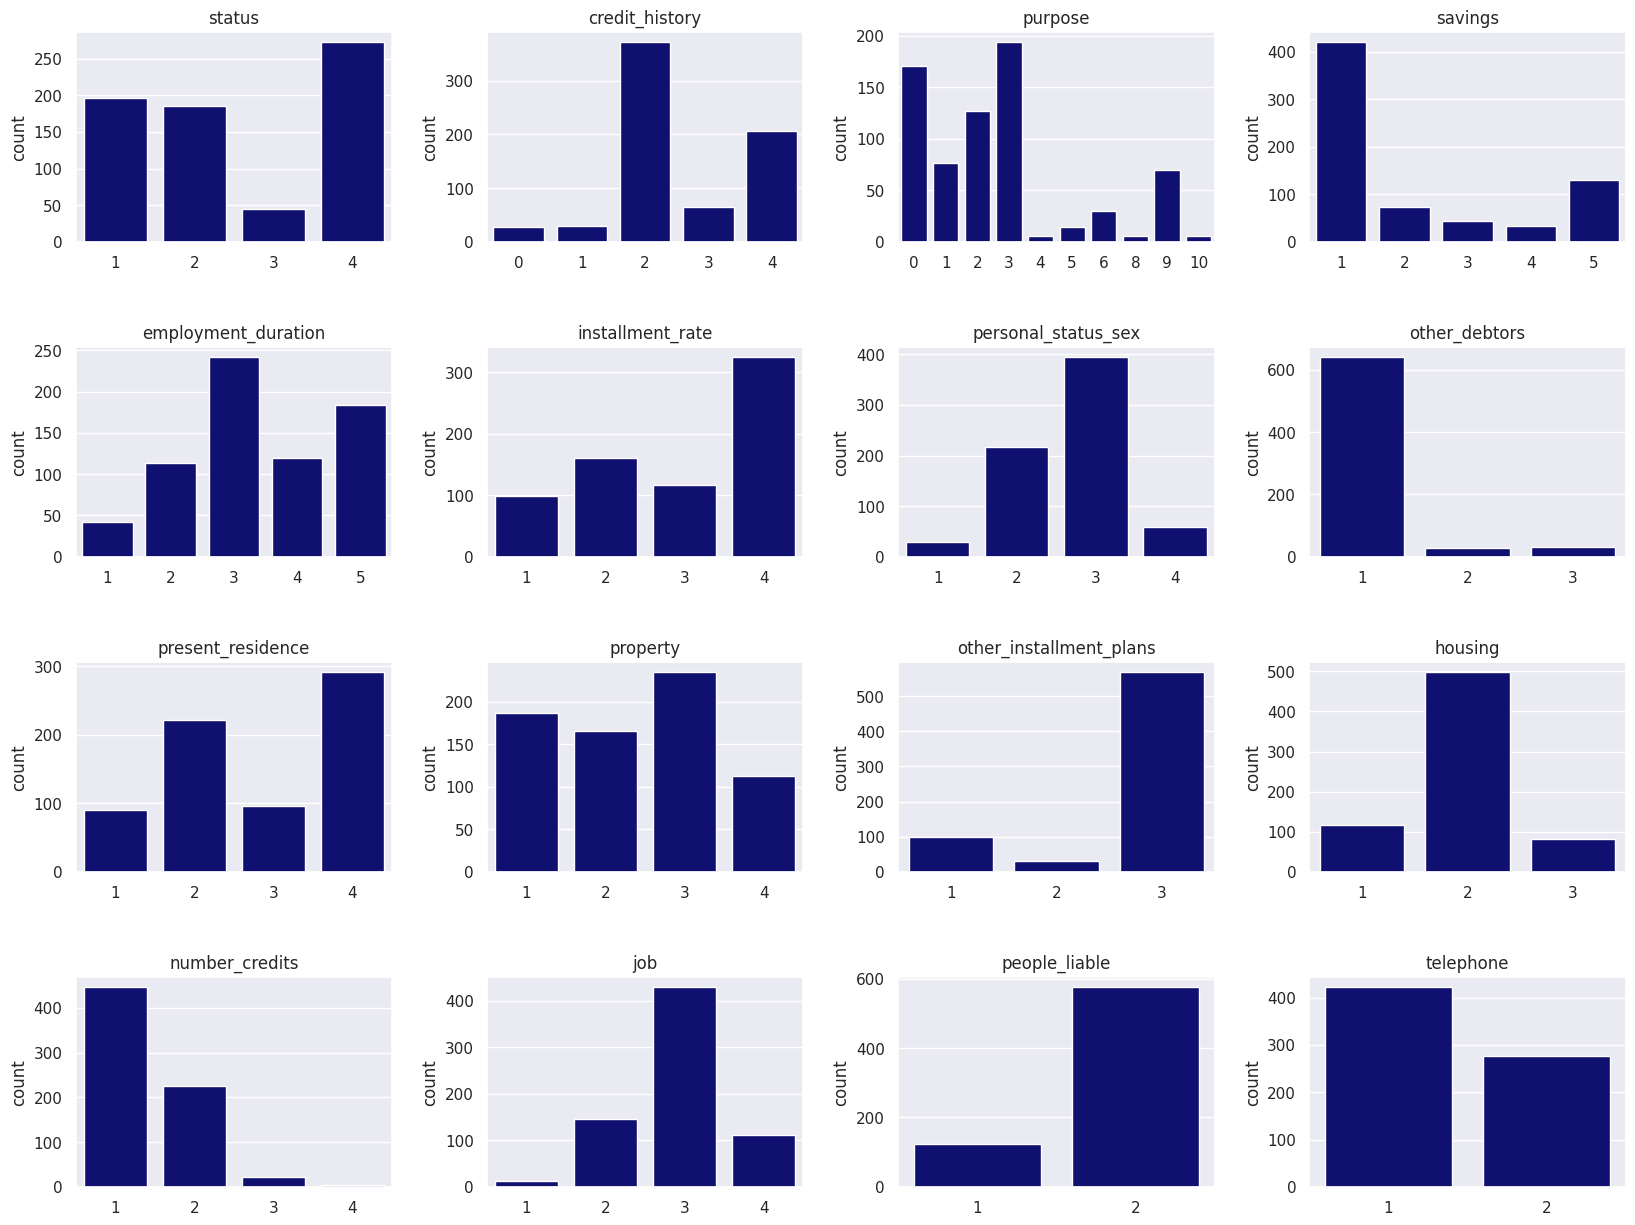

In [42]:
sns.set_theme()
fig, axes = plt.subplots(4,4, figsize=(20,15))
axes = axes.ravel()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(Xtrain.select_dtypes(include="category").columns.tolist(), axes):
  sns.countplot(x=Xtrain[colname],ax=ax, color='navy')
  ax.set(title=f'{(colname)}', xlabel=None)

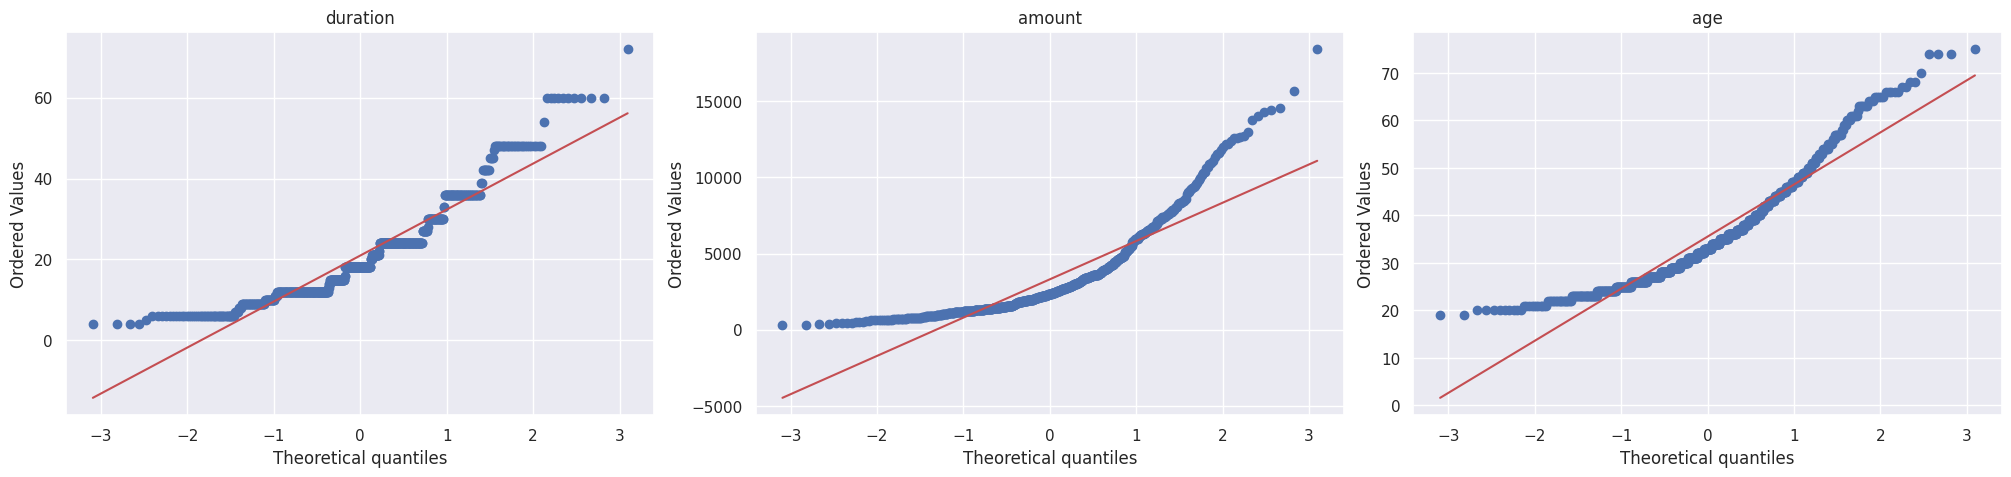

In [43]:
def make_qqplot(df, variables):

  plt.figure(figsize=(20, 20), constrained_layout=True)
  for i in range(len(variables)):
    # location in figure
    ax = plt.subplot(5, 3, i + 1)
    # variable to plot
    var = variables[i]
    # q-q plot
    stats.probplot((df[var]), dist="norm", plot=plt)
    # add variable name as title
    ax.set_title(var)
  plt.show()

make_qqplot(Xtrain, df.select_dtypes([np.number]).columns.to_list())


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   Transformación logaritmuica: En base a analizar los histogramas y qqplots para las variables categoricas aglomeran más hacia el lado izquierdo este tipo de datos se pueden volver mas normales usando este tipo de transformación
*   MinMaxScale: Los datos tienen una escala muy grande y variada entre cada una de las variables numericas por lo que mediante esta transformación se logra estandarizar los valores en un rango similar este tipo de transformación no altera la forma de la curva
*   Imputer: Tanto para variables numericas como nominales se realizara el imputer solo por precaución pues el dataset especficia que no hay registros NAN
*   OneHotEncoding: Para que los modelos no le asignen pesos a las variables nominales es necesario realizar esta transformación

No se realizaran transformacíones a las varibles ordinales pues ya se encuentran en un buen formato
etc ...


### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [44]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe_nombres = Xtrain.select_dtypes([np.number]).columns

num_pipe = Pipeline([
                     ('impMediana', SimpleImputer(strategy='median')),
                     ('LogTrans',FunctionTransformer(np.log,feature_names_out="one-to-one")),
                     ('MinMax', MinMaxScaler()),
                     ('YeoJ', PowerTransformer(method="yeo-johnson", standardize=False))
                     ])


# Variables categóricas Ordinales:
cat_nominal_pipe_nombres = ['status', 'credit_history', 'purpose','savings',
                    'personal_status_sex', 'other_debtors',
                    'other_installment_plans','housing']

cat_nominal_pipe = Pipeline([
    ('impMod', SimpleImputer(strategy='most_frequent')),
    ('catohe', OneHotEncoder(drop='first',handle_unknown='ignore'))
])


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:


columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipe, num_pipe_nombres),
                                                        ('catpipe', cat_nominal_pipe, cat_nominal_pipe_nombres)
                                                       ],
                                        remainder='passthrough'   # si hubiera más varaibles que no queremos procesar.
                                       )


# *********** Aquí termina la sección de agregar código *************

In [45]:

# Ajustamos (fit) las transformaciones al conjunto de entrenamiento:
XtrainFit = columnasTransformer.fit(Xtrain)   # Generamos la información necesaria con el conjunto de entrenamiento.

# Y ahora las aplicamos (transformer) a cada conjunto para evitar el data-leakage:
XtrainT = XtrainFit.transform(Xtrain)


enc_cat_features = columnasTransformer.named_transformers_['catpipe']['catohe'].get_feature_names_out()
passthrough_features = [col for col in X.columns if col not in num_pipe_nombres and col not in cat_nominal_pipe_nombres]
labels = np.concatenate([num_pipe_nombres, enc_cat_features, passthrough_features ])
XtrainT_pd = pd.DataFrame(XtrainT, columns=labels)


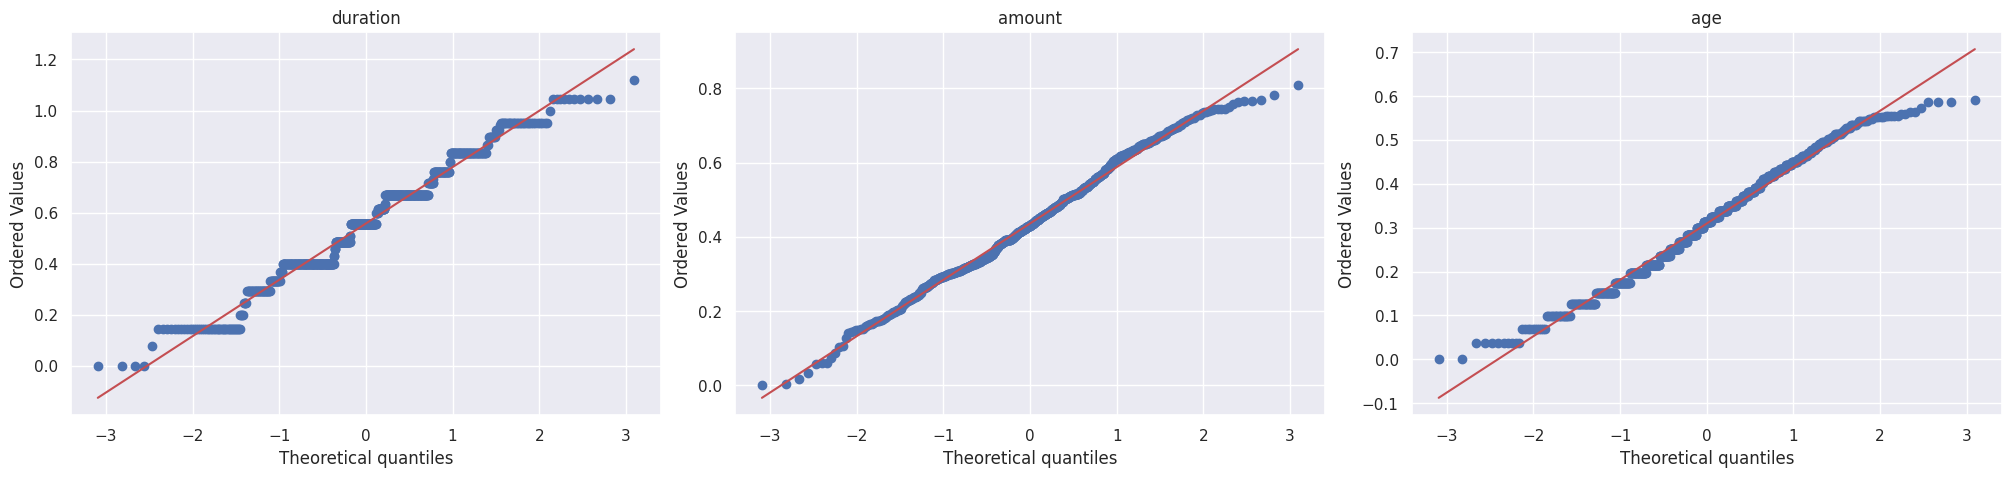

In [46]:
make_qqplot(XtrainT_pd, df.select_dtypes([np.number]).columns.to_list())

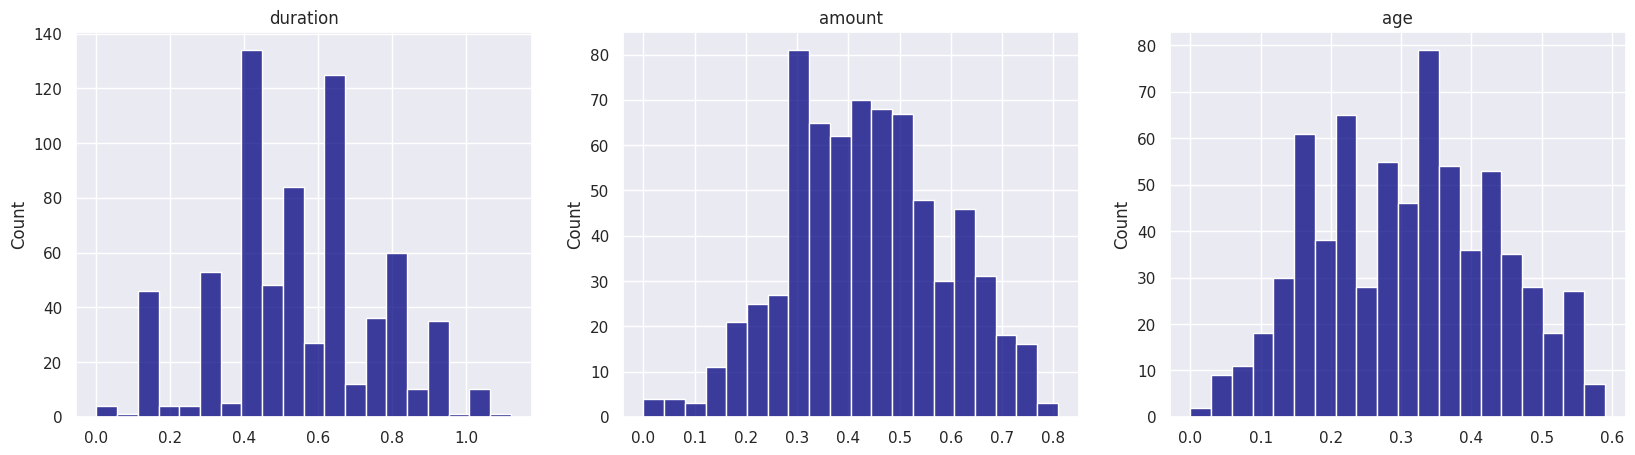

In [47]:
hist_numeric(XtrainT_pd)

## **Ejercicio 7**

In [48]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************
# Conjuntamos conjunto de Entrenamiento y Validación para usar Cross-Validation:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *********

print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


In [49]:
# Podemos verifcar la cantidad de columnas que se estarán gnerando después de aplicar las transformaciones:

Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)

print("Antes de las transformaciones:", Xtmp.shape)
print("Después de las transformaciones:", tmp.shape)

Antes de las transformaciones: (850, 20)
Después de las transformaciones: (850, 41)


## **Ejercicio 8**

In [50]:
 # Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=200,    # 10, 100, 1000
                                    C = 3.0,     # 0.000001, 0.005, 0.01,  1000
                                    random_state=42,
                                    class_weight={0:0.39, 1:0.61},
                                    solver='liblinear'
                                    ))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors = 15
                                      #metric='manhattan',
                                      #weights='uniform'
                                      ))
  nombres.append('kNN')


  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth = 18,       # None, 5, 3, 1
                                        min_samples_split=20,   # 2,3,5, 20
                                        min_samples_leaf=18,  # trata al inicio de usar solo uno de estos, split o leaf, para su mejor comprensión.
                                        random_state=42
                                        ))
  nombres.append('DTree')


  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators= 150, # Num arboles
                                        max_depth= 25,
                                        min_samples_split=20,
                                        min_samples_leaf=18,
                                        random_state=42
                                        ))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=30,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 5,             # 1,3, 6,
                               learning_rate=0.03,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=0.4,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               random_state=42,
                               objective='binary:logistic',
                               n_jobs=-1))
  nombres.append('XGBoost')


  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               solver='adam',
                               max_iter=5000,                  # 200,
                               alpha=0.0001,               # término de regularización L2.
                               learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                               learning_rate_init=0.001,
                               random_state=42
                               ))
  nombres.append('MLP')



  # Máquina de Vectores de Soporte:
  modelos.append(SVC(kernel='rbf',
                     C= 1.5,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight={0:0.31,1:0.61},     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     random_state=42
                     ))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres

# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":


modelo, nombres = mis_modelos()
resultados = list()

for i in range(len(modelo)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}   # métricas clasificación
  #mismetricas = {'neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error','r2'}  # métricas regresión

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      if ('test' in k) and j>2:
        print("")
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))


>> LR
	 test_accuracy 0.729 (0.029)
	 train_accuracy 0.767 (0.008)

	 test_recall 0.580 (0.048)
	 train_recall 0.656 (0.016)

	 test_precision 0.547 (0.047)
	 train_precision 0.603 (0.013)

	 test_f1 0.562 (0.044)
	 train_f1 0.628 (0.012)

	 test_roc_auc 0.770 (0.031)
	 train_roc_auc 0.824 (0.008)
>> kNN
	 test_accuracy 0.727 (0.016)
	 train_accuracy 0.757 (0.009)

	 test_recall 0.307 (0.056)
	 train_recall 0.355 (0.031)

	 test_precision 0.583 (0.049)
	 train_precision 0.685 (0.027)

	 test_f1 0.400 (0.056)
	 train_f1 0.467 (0.029)

	 test_roc_auc 0.701 (0.023)
	 train_roc_auc 0.783 (0.009)
>> DTree
	 test_accuracy 0.706 (0.025)
	 train_accuracy 0.785 (0.007)

	 test_recall 0.391 (0.063)
	 train_recall 0.494 (0.047)

	 test_precision 0.516 (0.063)
	 train_precision 0.706 (0.033)

	 test_f1 0.442 (0.054)
	 train_f1 0.579 (0.026)

	 test_roc_auc 0.701 (0.028)
	 train_roc_auc 0.841 (0.008)
>> RF
	 test_accuracy 0.716 (0.015)
	 train_accuracy 0.744 (0.011)

	 test_recall 0.081 (0.036)
	 t

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.**

El Error mas costoso en base a la matriz dada en la documentación el error mas costoso sería los FP, ya que esto significa que el modelo clasifica a un cliente como Bueno cuando realmente es un mal cliente lo que nos llevaría a perdidas significativas pues el cliente no pagará su credito.

**b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.**

La métrica mas relevantes relacionada con FP es la Precisión ya que nos indica cuantas de las clasificaciones positivas fueron correctas, y una baja precisión indica un alto número de Falsos Positivos

Indica cuántas de las clasificaciones positivas del modelo (clientes considerados buenos) fueron realmente correctas. Una baja precisión indica un alto número de Falsos Positivos.
Especificidad (Specificity): La habilidad del modelo para identificar correctamente los negativos reales (en este caso, los malos clientes).

**c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.![Captura.JPG](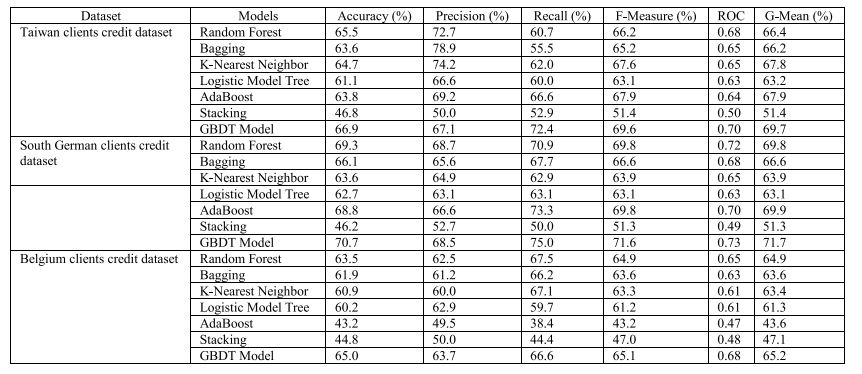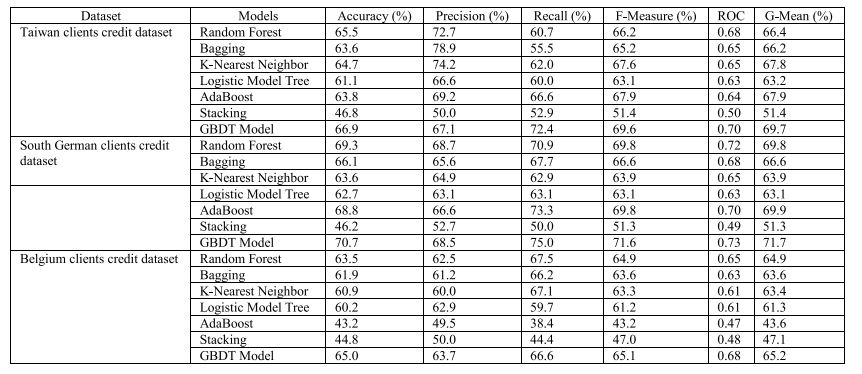)**

En base a buscar conocer información especifica sobre la Precisión y el Accuracy que es una métrica que en general nos ayuda a calificar los modelos las metricas que nos ayudarían serían

Balance Accuracy Score: Usada cuando se tienen clases desbalanceadas
Average Precision Score: Esta nos brinda otra manera de visualizar la metrica de precision basada en el promedio

F1 Score: Es el promedio armónico de precisión y recall. Puede ser útil cuando se necesita un balance entre estas dos métricas, mediante esta podemos evaluar tanto los FN, como FP.

Área Bajo la Curva Precision-Recall (AUC-PR): Métrica útil cuando se presentan clases desbalanceadas


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

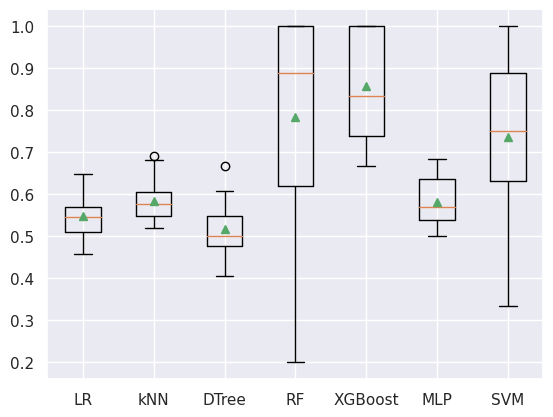

In [51]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************
tmp = [resultados[j]['test_precision'] for j in range(len(resultados)) ]
#tmp = [resultados[i]['test_recall'] for i in range(len(resultados))]
plt.boxplot(tmp, labels=nombres, showmeans=True)
plt.show()

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [52]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

 # Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.




def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators= 150, # Num arboles
                                        max_depth= 25,
                                        min_samples_split=20,
                                        min_samples_leaf=18,
                                        random_state=42
                                        ))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=30,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 5,             # 1,3, 6,
                               learning_rate=0.03,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=0.4,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               random_state=42,
                               objective='binary:logistic',
                               n_jobs=-1))
  nombres.append('XGBoost')


  # Máquina de Vectores de Soporte:
  modelos.append(SVC(kernel='rbf',
                     C= 1.5,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight={0:0.31,1:0.61},     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     random_state=42
                     ))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres

# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":


modelo, nombres = mis_modelos()
resultados = list()
sme = BorderlineSMOTE(sampling_strategy=0.5,
                      random_state=11)

#sme = SMOTE(sampling_strategy=0.9,
 #                     random_state=11)

sme = TomekLinks(sampling_strategy='majority')

#sme = RandomUnderSampler(sampling_strategy=0.6)


for i in range(len(modelo)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = ImbPipeline(steps=[('ct', columnasTransformer),
                                  ('smote', sme),
                                  ('m', modelo[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}   # métricas clasificación
  #mismetricas = {'neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error','r2'}  # métricas regresión

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      if ('test' in k) and j>2:
        print("")
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

# *********** Aquí termina la sección de agregar código *************

>> RF
	 test_accuracy 0.729 (0.013)
	 train_accuracy 0.770 (0.007)

	 test_recall 0.173 (0.063)
	 train_recall 0.273 (0.026)

	 test_precision 0.725 (0.114)
	 train_precision 0.875 (0.036)

	 test_f1 0.271 (0.074)
	 train_f1 0.415 (0.029)

	 test_roc_auc 0.756 (0.018)
	 train_roc_auc 0.845 (0.005)
>> XGBoost
	 test_accuracy 0.742 (0.012)
	 train_accuracy 0.774 (0.008)

	 test_recall 0.179 (0.037)
	 train_recall 0.261 (0.030)

	 test_precision 0.824 (0.092)
	 train_precision 0.945 (0.024)

	 test_f1 0.292 (0.053)
	 train_f1 0.408 (0.037)

	 test_roc_auc 0.755 (0.041)
	 train_roc_auc 0.885 (0.008)
>> SVM
	 test_accuracy 0.734 (0.022)
	 train_accuracy 0.783 (0.008)

	 test_recall 0.327 (0.059)
	 train_recall 0.421 (0.045)

	 test_precision 0.613 (0.072)
	 train_precision 0.746 (0.034)

	 test_f1 0.422 (0.056)
	 train_f1 0.536 (0.034)

	 test_roc_auc 0.748 (0.032)
	 train_roc_auc 0.827 (0.005)


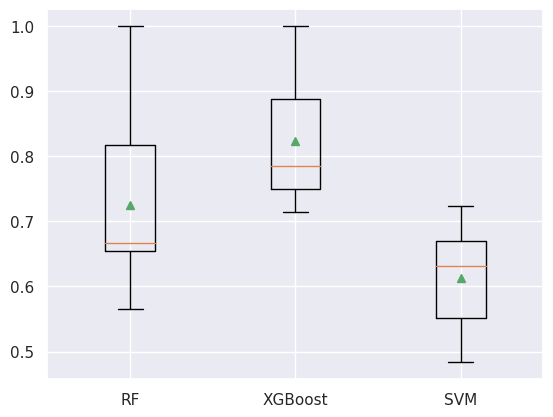

In [53]:
tmp = [resultados[j]['test_precision'] for j in range(len(resultados)) ]
plt.boxplot(tmp, labels=nombres, showmeans=True)
plt.show()

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

En base a los análisis del comportamiento de los 3 mejores modelos se determino que el modelo de XGBoost es que esta dando un mejor desempeño tras amplicar técnicas de resampling en el parametro de precisión este resulta ser el que nos interesa ya que el objetivo es dismunir el número de FP

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [173]:
def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************


  # XGBoosting:
  modelos.append(XGBClassifier(booster= 'gbtree',
                               n_estimators=10,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 7,             # 1,3, 6,
                               learning_rate=0.05,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=0.6,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               random_state=42,
                               objective='binary:logistic',
                               #colsample_bytree=0.5,
                               n_jobs=-1))
  nombres.append('XGBoost')


  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres

# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":


modelo, nombres = mis_modelos()
resultados = list()
sme = BorderlineSMOTE(sampling_strategy=0.5,
                      random_state=11)


sme = TomekLinks(sampling_strategy='majority')


for i in range(len(modelo)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = ImbPipeline(steps=[('ct', columnasTransformer),
                                  ('smote', sme),
                                  ('m', modelo[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}   # métricas clasificación
  #mismetricas = {'neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error','r2'}  # métricas regresión

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      if ('test' in k) and j>2:
        print("")
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> XGBoost
	 test_accuracy 0.712 (0.008)
	 train_accuracy 0.730 (0.012)

	 test_recall 0.051 (0.029)
	 train_recall 0.101 (0.039)

	 test_precision 0.826 (0.271)
	 train_precision 0.976 (0.030)

	 test_f1 0.094 (0.051)
	 train_f1 0.181 (0.063)

	 test_roc_auc 0.756 (0.026)
	 train_roc_auc 0.915 (0.005)


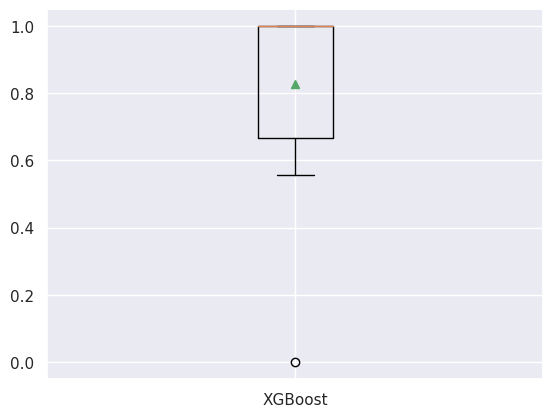

In [174]:
tmp = [resultados[j]['test_precision'] for j in range(len(resultados)) ]
plt.boxplot(tmp, labels=nombres, showmeans=True)
plt.show()

## **Ejercicio 14**

In [214]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

ModeloXG = XGBClassifier(booster= 'gbtree',
                               n_estimators=10,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 7,             # 1,3, 6,
                               learning_rate=0.06,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=0.5,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               random_state=42,
                               objective='binary:logistic',
                               #colsample_bytree=0.7,
                               n_jobs=-1)


sme = TomekLinks(sampling_strategy='majority')

pipeline = ImbPipeline(steps=[('ct', columnasTransformer),
                                  ('smote', sme),
                                  ('m', ModeloXG)])

pipeline.fit(Xtrainval,ytrainval)

# PROFESOR:
# Verificar que utilicen el conjunto de Prueba Test:
yhat = pipeline.predict(Xtest)

print(classification_report(ytest, yhat))

print('Métrica-ROC-Test:', np.round(roc_auc_score(ytest, yhat), 2))

# *********** Aquí termina la sección de agregar código *************


              precision    recall  f1-score   support

           0       0.70      0.96      0.81       105
           1       0.33      0.04      0.08        45

    accuracy                           0.69       150
   macro avg       0.52      0.50      0.44       150
weighted avg       0.59      0.69      0.59       150

Métrica-ROC-Test: 0.5


In [212]:
confusion_matrix(ytest, yhat)

array([[101,   4],
       [ 42,   3]])

Text(0.5, 132.74999999999994, 'Predicted label')

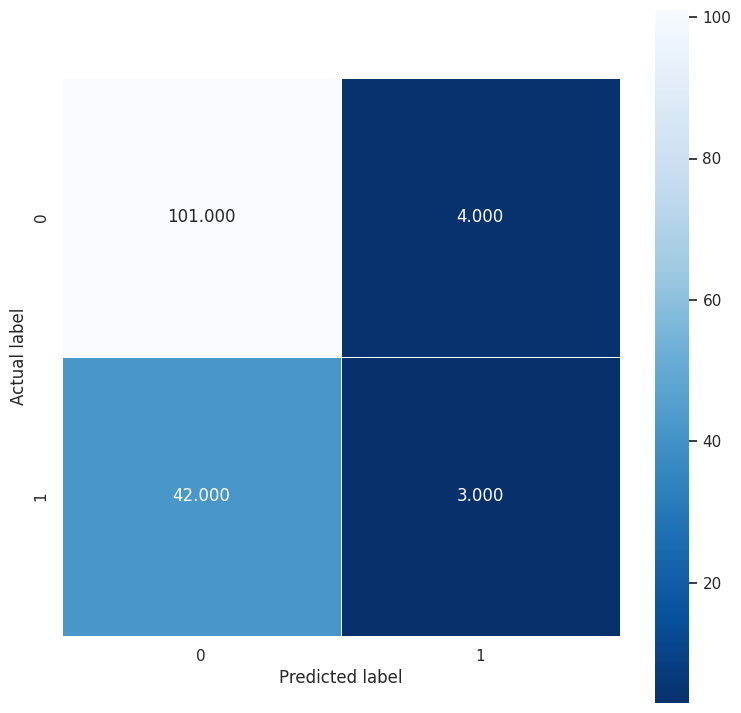

In [213]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************

cm = confusion_matrix(ytest, yhat)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# *********** Aquí termina la sección de agregar código *************

In [216]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

importance = ModeloXG.feature_importances_

for i,v in enumerate(importance):
 print('Factor: %0d, Coef-modelo: %.5f' % (i,v))

# *********** Aquí termina la sección de agregar código *************

Factor: 0, Coef-modelo: 0.04164
Factor: 1, Coef-modelo: 0.02244
Factor: 2, Coef-modelo: 0.01772
Factor: 3, Coef-modelo: 0.01893
Factor: 4, Coef-modelo: 0.02718
Factor: 5, Coef-modelo: 0.19119
Factor: 6, Coef-modelo: 0.03500
Factor: 7, Coef-modelo: 0.01802
Factor: 8, Coef-modelo: 0.02227
Factor: 9, Coef-modelo: 0.04229
Factor: 10, Coef-modelo: 0.02705
Factor: 11, Coef-modelo: 0.00684
Factor: 12, Coef-modelo: 0.01455
Factor: 13, Coef-modelo: 0.00000
Factor: 14, Coef-modelo: 0.00000
Factor: 15, Coef-modelo: 0.01153
Factor: 16, Coef-modelo: 0.00000
Factor: 17, Coef-modelo: 0.00861
Factor: 18, Coef-modelo: 0.00000
Factor: 19, Coef-modelo: 0.01758
Factor: 20, Coef-modelo: 0.00318
Factor: 21, Coef-modelo: 0.04099
Factor: 22, Coef-modelo: 0.04444
Factor: 23, Coef-modelo: 0.01843
Factor: 24, Coef-modelo: 0.02568
Factor: 25, Coef-modelo: 0.01690
Factor: 26, Coef-modelo: 0.00501
Factor: 27, Coef-modelo: 0.04913
Factor: 28, Coef-modelo: 0.01982
Factor: 29, Coef-modelo: 0.01533
Factor: 30, Coef-mod

<Axes: xlabel='Coefficient', ylabel='Feature'>

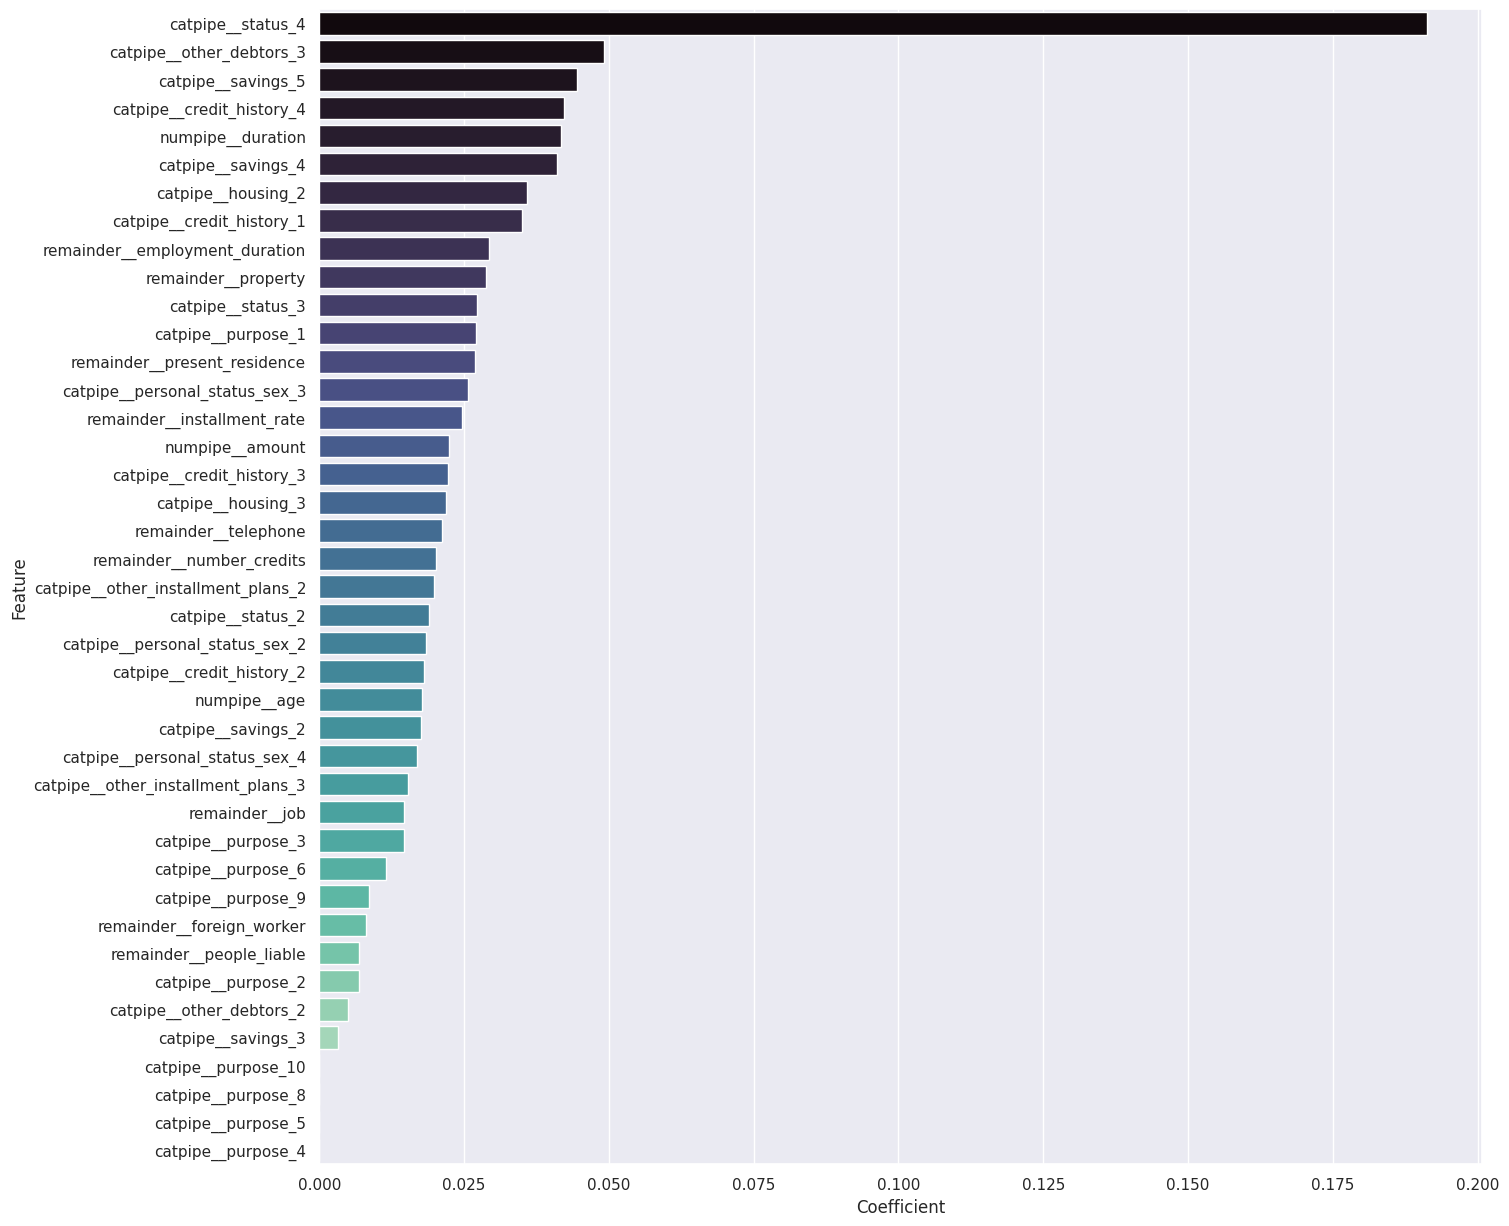

In [225]:
transformed_columns = pipeline.named_steps['ct'].get_feature_names_out()
len(transformed_columns)


coeficientes = pd.DataFrame({'Feature': transformed_columns, 'Coefficient': importance})

# Ordenar los coeficientes por magnitud (absoluta) para visualizar mejor los más importantes
coef_df = coeficientes.sort_values(by='Coefficient',ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(data=coef_df, y='Feature', hue='Feature', x='Coefficient', palette='mako', legend=False)

De acuerdo al análisis de la importancia de los factores es posible notar que los factores a los que el modelo les da un mayor peso corresponden a lo relacionado con su status, su ahorros y su historial crediticio dichas observaciones son muy acertadas, en al ámbito bancario al solicitar un prestamo, una nueva tarjeta usualmente se realizan el tipo de preguntas relacionadas a estos tres parametros por ejemplo: ¿Actualmente se encuentra pagando otro credito?, ¿Cuenta con una cuenta de ahorros?, de igual manera se investiga al cliente para saber el estatus actual de sus cuentas evidentemente si sus datos arrojan que sus patrimonio no se ha mantenido significa que posiblemente pagar un credito le resulte complicado

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++

A lo largo de esta actividad se realizo un análisis de diferentes modelos para resolver el problema relacionado a conocer si una cliente debe ser catalogado como buen cliente o como mal cliente.


Tras realizar un EDA para identificar el tipo de variables y como se comportaban fue posible diseñar un pipeline de preprocesamiento, así mismo se establecieorn grupos de train, validation y test para evitar el filtrado de información

Una vez terminado el preprocesamiento se inicio con el análisis de modelos para determinar cual daba mejores resultados basado en sus métricas mediante el metodo de Cross Validation, para ello fue necesario entender el impacto de los diferentes hiperparametros para lograr un tuneo de ellos buscando incrementar el accuracy.

Al ser este un caso real es necesario consultar toda la información posible tanto del dataset como los intereses del cliente en este caso como parte del análisis de la matriz de costo lo que se busca es reducir el número de FP es decir cuando el modelo califa como Bueno a un cliente que es Mal cliente.

Una vez comprendido esto se realizo un nuevo análisis centrado en mejorar la métrica de precision ya que es la que guarda mayor relación con los FP se incluyeron procesos de sobremuestreo para elegir el mejor modelo.

El modelo elegido fue XGboost que mostro ser consistente en precisión y accuracy presenta un poco de sobreentrenamiento respecto a la métrica de precisión y se trato de dismunir lo mas posible, además de que en terminos de accuracy la diferencia se encuentra cercana al 3% entre el conjunto de train y validation por lo que se encuentra equilibrado.

Es posible notar que en la matriz de confusión realizada con el conjunto de test se tiene unicamente un total de 4 FP esto quiere decir que se esta evitando dar prestamos a personas que es probable no puedan pagarlo, hay que notar sin embargo que el número de FN es relativamente alto lo que igual hay que tomar en cuenta pues representa que se estan negando creditos a personas que realmente si pueden pagar.

Durante el proceso de validation se obtuvo que la precisión del modelo ronadaba cerca del 70%-80% siendo este un valor aceptable comparado con los resultados dados por el articulo de IEEE donde mediante técnicas similares obtienen valores entre 80% y 85% por lo que el modelo es competente.

Sin embargo cabe destacar que por ultimo en las pruebas de test las metricas de precision para la clase 1 (mal cliente) son bajas lo que signifca que el modelo la mayoria de las veces predice a un cliente como malo cuando es bueno, para los fines de no dar creditos a personas que no lo podrán pagar se debe considerar lograr una mejora en minimizar los FP ya que significa que se estarian negando muchos creditos lo que evitaría entrada de capital nuevo.




### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**